In [1]:
#Персептрон
class Perceptron:
    #Конструктор
    def __init__(self,N):
        self.w=list()
        for i in range(N):
            self.w.append(0)
    #Значения персептрона
    def calc(self,x):
        res=0
        for i in range(len(self.w)):
            res=res+self.w[i]*x[i]
        return res
    #Активация
    def sign(self,x):
        if self.calc(x)>0:
            return 1
        else:
            return -1
    #Обучение на одном примере
    def learn(self,la,x,y):
        #Когда результат неверный - обучаем
        if y*self.calc(x)<=0:
            for i in range(len(self.w)):
                self.w[i]=self.w[i]+la*y*x[i]
    #Полное Обучение
    def learning(self,la,T):
        for n in range(100):
            for t in T:
                self.learn(la,t[0],t[1])
perceptron = Perceptron(2)
la=0.1 #константа обучения
#Создаем примеры
T=list()
T.append([[2,1],1])
T.append([[3,2],1])
T.append([[4,1],1])
T.append([[1,2],-1])
T.append([[2,3],-1])
T.append([[5,7],-1])
perceptron.__init__
perceptron.learning(la, T)
print("Веса, сгенерированне персептроном:",perceptron.w)
#проверка
print("Класс элемента:",perceptron.sign([1.5,2]))
print("Класс элемента:",perceptron.sign([3,1.5]))
print("Класс элемента:",perceptron.sign([5,1]))
print("Класс элемента:",perceptron.sign([5,10]))    

Веса, сгенерированне персептроном: [0.1, -0.1]
Класс элемента: -1
Класс элемента: 1
Класс элемента: 1
Класс элемента: -1


In [2]:
#Нейрон
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))
class Neuron:
    def __init__(self, weights,bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self,inputs):
        total =np.dot(self.weights,inputs) + self.bias
        return (sigmoid(total))
weights=np.array([0,1])
bias=4 #c=4
n=Neuron(weights,bias)
x=np.array([2,3])
print("Значение сигмоиды: ",round(n.feedforward(x),3))

Значение сигмоиды:  0.999


In [3]:
#Пример нейронной сети для двух нейронов
class NeuralNetwork1:
    def __init__(self):
        weights=np.array([0,1])
        bias=0
        self.h1=Neuron(weights,bias)
        self.h2=Neuron(weights,bias)
        self.o1=Neuron(weights,bias)
    def feedforward(self,x):
        out_h1=self.h1.feedforward(x)
        out_h2=self.h2.feedforward(x)
        out_o1=self.o1.feedforward(np.array([out_h1,out_h2]))
        return out_o1
network = NeuralNetwork1()
x=np.array([2,3])
print("Значение сигмоиды от двух нейронов:",round(network.feedforward(x),3))

Значение сигмоиды от двух нейронов: 0.722


In [4]:
def sigmoid_derivative(sigm):
        for i in range(len(sigm)):
            sigm[i]=sigm[i]*(sigm[i]-1)
        return sigm
#Класс нейронной сети
class NeuralNetwork:
    def __init__(self,x,y):
        self.input=x
        self.weights1=np.random.rand(self.input.shape[1],4)
        self.weights2=np.random.rand(4,1)
        self.y=y
        self.output=np.zeros(self.y.shape[0])
    #Прямое распространение
    def feedforward(self):
        self.layer1=sigmoid(np.dot(self.input,self.weights1))
        self.output=sigmoid(np.dot(self.layer1,self.weights2))

    #Обратное распространение (корректировка по производным)
    def backprop(self):
        #производные веса
        d_weights2=np.dot(self.layer1.T, (2*(self.y-self.output)*sigmoid_derivative(self.output)))
        d_weights1=np.dot(self.input.T, (np.dot(2*(self.y-self.output)*sigmoid_derivative(self.output),self.weights2.T)*sigmoid_derivative(self.layer1)))
        #наклон
        self.weights1+=d_weights1
        self.weights2+=d_weights2
        for i in range(self.weights1.shape[0]):
             for j in range(self.weights1.shape[1]):
                self.weights1[i][j]=round(self.weights1[i][j],3)
        for i in range(self.weights2.shape[0]):
             for j in range(self.weights2.shape[1]):
                self.weights2[i][j]=round(self.weights2[i][j],3)
x = np.array([[0.1, 0.5, 0.8],
              [0.2, 0.4, 0.1]])
y = np.array([[0.6],
              [0.3]])
NW=NeuralNetwork(x,y)
NW.feedforward()
NW.backprop()
print("Скорректированные веса 1:",NW.weights1)
print("Скорректированные веса 2:",NW.weights2)
    

Скорректированные веса 1: [[0.703 0.893 0.066 0.834]
 [0.56  0.321 0.842 0.702]
 [0.925 0.101 0.186 0.254]]
Скорректированные веса 2: [[0.978]
 [0.553]
 [1.028]
 [0.852]]


Задание 1
Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork.
Данные нейросети:
− три входа (𝑥1, 𝑥2, 𝑥3);
− три нейрона в скрытых слоях (ℎ1, ℎ2, ℎ3);
− выход (𝑜1).
Нейроны имеют идентичные веса и пороги:
− 𝑤 = [0.5, 0.5, 0.5]
− 𝑏 = 0
Данные нейросети:
− два входа (𝑥1, 𝑥2);
− два нейрона в скрытых слоях (ℎ1, ℎ2);
− два выхода (𝑜1, 𝑜2).
Нейроны имеют идентичные веса и пороги:
− 𝑤 = [1, 0];
− 𝑏 = 1.


In [5]:
#Пример нейронной сети для трех нейронов
class NeuralNetwork2:
    def __init__(self):
        weights=np.array([0.5,0.5,0.5])
        bias=0
        self.h1=Neuron(weights,bias)
        self.h2=Neuron(weights,bias)
        self.h3=Neuron(weights,bias)
        self.o1=Neuron(weights,bias)
    def feedforward(self,x):
        out_h1=self.h1.feedforward(x)
        out_h2=self.h2.feedforward(x)
        out_h3=self.h3.feedforward(x)
        out_o1=self.o1.feedforward(np.array([out_h1,out_h2,out_h3]))
        return out_o1
network = NeuralNetwork2()
x1=np.array([2,3,4])
print("Значение сигмоиды от трех нейронов:",round(network.feedforward(x1),3))
#Пример нейроной сети для двух нейронов
class NeuralNetwork3:
    def __init__(self):
        weights=np.array([1,0])
        bias=1
        self.h1=Neuron(weights,bias)
        self.h2=Neuron(weights,bias)
        self.o1=Neuron(weights,bias)
    def feedforward(self,x):
        out_h1=self.h1.feedforward(x)
        out_h2=self.h2.feedforward(x)
        out_o1=self.o1.feedforward(np.array([out_h1,out_h2]))
        return out_o1
network = NeuralNetwork3()
x=np.array([0.56,2])
print("Значение сигмоиды от двух нейронов:",round(network.feedforward(x),3))

Значение сигмоиды от трех нейронов: 0.815
Значение сигмоиды от двух нейронов: 0.861


Задание 2
Реализуйте классы нейронных сетей с использованием других функций
активации.
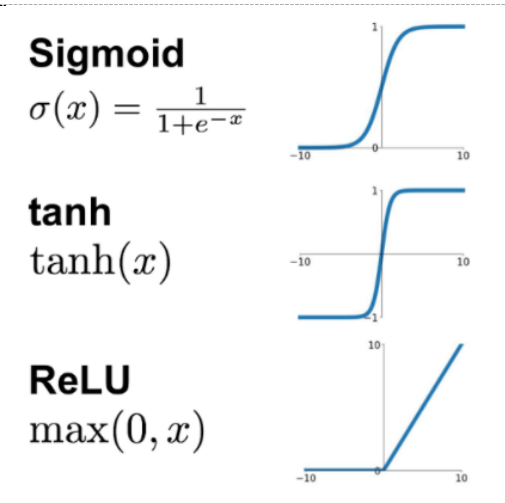


Скорректированные веса для Сигмоиды:
 W1: [[-0.01   0.911  0.661  0.49 ]
 [-0.248  0.629 -0.277  0.607]
 [ 0.009  0.508  0.389  0.302]
 [ 0.435  0.566  0.564  0.572]] 
W2: [[-0.568]
 [-1.228]
 [-0.67 ]
 [-1.254]]
Скорректированные веса для Tanh:
 W1: [[0.975 0.553 0.235 0.218]
 [0.555 0.514 0.613 0.301]
 [0.829 0.652 0.302 0.794]
 [0.552 0.375 0.677 0.788]] 
W2: [[3.621]
 [2.754]
 [1.501]
 [2.98 ]]
Скорректированные веса для ReLU:
 W1: [[ 60.589   3.083   9.365  34.2  ]
 [-14.645   5.651  -1.975  -7.945]
 [ 40.978   3.305   6.3    22.899]
 [ 68.187   1.375  10.322  38.531]] 
W2: [[-124.265]
 [ -84.965]
 [ -51.158]
 [-211.939]]


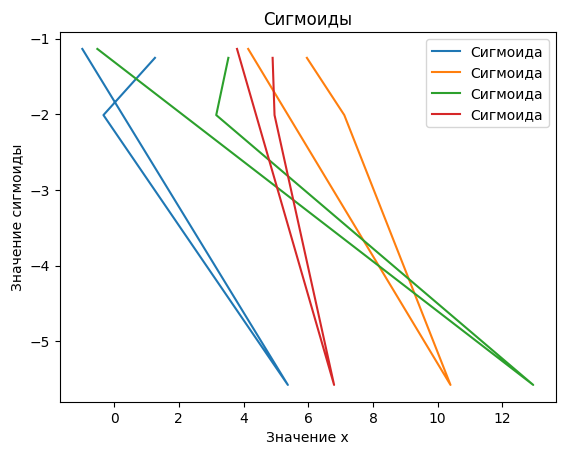

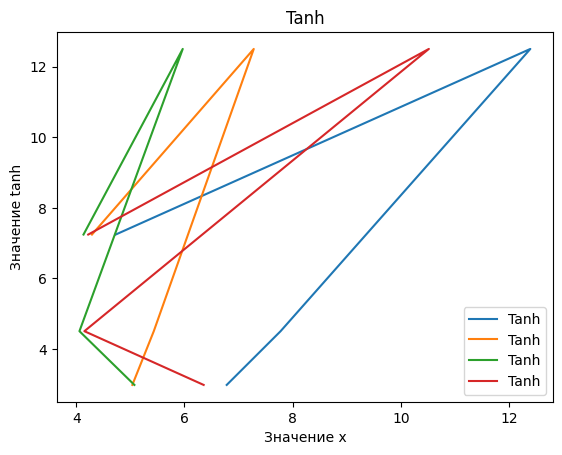

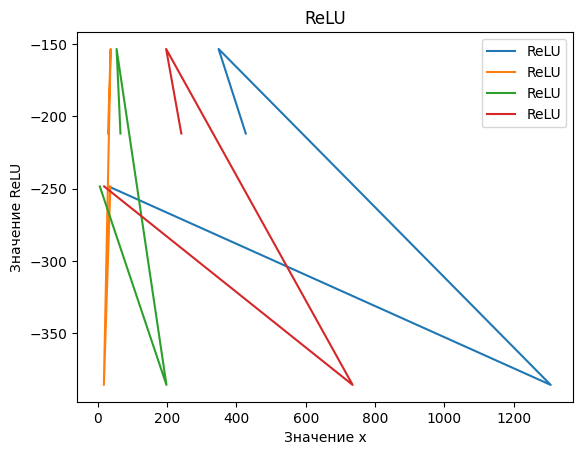

In [6]:
import matplotlib.pyplot as plt
def sigmoid_derivative(sigm):
        for i in range(len(sigm)):
            sigm[i]=sigm[i]*(sigm[i]-1)
        return sigm
#Класс нейронной сети для сигмоиды
class NeuralNetwork_sigm:
    def __init__(self,x,y):
        self.input=x
        self.weights1=np.random.rand(self.input.shape[1],4)
        self.weights2=np.random.rand(4,1)
        self.y=y
        self.output=np.zeros(self.y.shape)
    #Прямое распространение
    def feedforward(self):
        self.layer1=sigmoid(np.dot(self.input,self.weights1))
        self.output=sigmoid(np.dot(self.layer1,self.weights2))
    #Обратное распространение (корректировка по производным)
    def backprop(self):
        #производные веса
        d_weights2=np.dot(self.layer1.T,(2*(self.y-self.output)*sigmoid_derivative(self.output)))
        d_weights1=np.dot(self.input.T, (np.dot(2*(self.y-self.output)*sigmoid_derivative(self.output),self.weights2.T)*sigmoid_derivative(self.layer1)))
        #наклон
        self.weights1+=d_weights1
        self.weights2+=d_weights2
        for i in range(self.weights1.shape[0]):
             for j in range(self.weights1.shape[1]):
                self.weights1[i][j]=round(self.weights1[i][j],3)
        for i in range(self.weights2.shape[0]):
             for j in range(self.weights2.shape[1]):
                self.weights2[i][j]=round(self.weights2[i][j],3)
#Гиперболический тангенс:
def tanh(x):
    return np.tanh(np.deg2rad(x))
#Производная тангенса
def tanh_der(x):
    for i in range(len(x)):
        x[i]=1/(np.cosh(x[i])**2)
    return x
class NeuralNetwork_tanh:
    def __init__(self,x,y):
        self.input=x
        self.weights1=np.random.rand(self.input.shape[1],4)
        self.weights2=np.random.rand(4,1)
        self.y=y
        self.output=np.zeros(self.y.shape)
    #Прямое распространение
    def feedforward(self):
        self.layer1=tanh(np.dot(self.input,self.weights1))
        self.output=tanh(np.dot(self.layer1,self.weights2))
    #Обратное распространение (корректировка по производным)
    def backprop(self):
        #производные веса
        d_weights2=np.dot(self.layer1.T,(2*(self.y-self.output)*tanh_der(np.dot(self.layer1,self.weights2))))
        d_weights1=np.dot(self.input.T,(np.dot(2*(self.y-self.output)*tanh_der(np.dot(self.layer1,self.weights2)),self.weights2.T)*tanh_der(np.dot(self.input,self.weights1))))
        #наклон
        self.weights1+=d_weights1
        self.weights2+=d_weights2
        for i in range(self.weights1.shape[0]):
             for j in range(self.weights1.shape[1]):
                self.weights1[i][j]=round(self.weights1[i][j],3)
        for i in range(self.weights2.shape[0]):
             for j in range(self.weights2.shape[1]):
                self.weights2[i][j]=round(self.weights2[i][j],3)
def ReLU(x):
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i][j]=max(0,x[i][j])
    return x
def ReLU_der(x):
    for i in range(len(x)):
        x[i]=(1*(x[i]>0)+0*(x[i]==0))
    return x
class NeuralNetwork_ReLU:
    def __init__(self,x,y):
        self.input=x
        self.weights1=np.random.rand(self.input.shape[1],4)
        self.weights2=np.random.rand(4,1)
        self.y=y
        self.output=np.zeros(self.y.shape)
    #Прямое распространение
    def feedforward(self):
        self.layer1=ReLU(np.dot(self.input,self.weights1))
        self.output=ReLU(np.dot(self.layer1,self.weights2))
    #Обратное распространение (корректировка по производным)
    def backprop(self):
        #производные веса
        d_weights2=np.dot(self.layer1.T,(2*(self.y-self.output)*ReLU_der(self.output)))
        d_weights1=np.dot(self.input.T,(np.dot(2*(self.y-self.output)*ReLU_der(self.output),self.weights2.T)*ReLU_der(self.layer1)))
        #наклон
        self.weights1+=d_weights1
        self.weights2+=d_weights2
        for i in range(self.weights1.shape[0]):
             for j in range(self.weights1.shape[1]):
                self.weights1[i][j]=round(self.weights1[i][j],3)
        for i in range(self.weights2.shape[0]):
             for j in range(self.weights2.shape[1]):
                self.weights2[i][j]=round(self.weights2[i][j],3)
x = np.array([[-1, 5, 3.2,0.5],
              [7, -5.3, 4,9.4],
              [4, 3, 2,1],
              [1, 2, 3,4]])
y = np.array([[2],
              [4.54],
              [3],
              [1]])
nw1=NeuralNetwork_sigm(x,y)
nw2=NeuralNetwork_tanh(x,y)
nw3=NeuralNetwork_ReLU(x,y)
nw1.feedforward()
nw1.backprop()
nw2.feedforward()
nw2.backprop()
nw3.feedforward()
nw3.backprop()
print("Скорректированные веса для Сигмоиды:\n", "W1:",nw1.weights1,"\nW2:",nw1.weights2)
print("Скорректированные веса для Tanh:\n", "W1:",nw2.weights1,"\nW2:",nw2.weights2)
print("Скорректированные веса для ReLU:\n", "W1:",nw3.weights1,"\nW2:",nw3.weights2)
x1=np.dot(x,nw1.weights1)
y1=np.zeros(y.shape)
x2=np.dot(x,nw2.weights1)
y2=np.zeros(y.shape)
x3=np.dot(x,nw3.weights1)
y3=np.zeros(y.shape)
for i in range(4):
    y1[i][0]=y[i][0]*nw1.weights2[i][0]
    y2[i][0]=y[i][0]*nw2.weights2[i][0]
    y3[i][0]=y[i][0]*nw3.weights2[i][0]
l=str("Значение x")
l1 = str('Значение сигмоиды')
l2 = str('Значение tanh')
l3 = str('Значение ReLU')
plt.title('Сигмоиды')
plt.xlabel(l)
plt.ylabel(l1)
plt.plot(x1,y1,label='Сигмоида')
plt.legend()
plt.show()
plt.title('Tanh')
plt.xlabel(l)
plt.ylabel(l2)
plt.plot(x2,y2,label='Tanh')
plt.legend()
plt.show()
plt.title('ReLU')
plt.xlabel(l)
plt.ylabel(l3)
plt.plot(x3,y3,label='ReLU')
plt.legend()
plt.show()


C:\Users\borga\AppData\Local\Temp\ipykernel_14956\1903717699.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\borga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Точность теста 1: 0.983
Точность тренировки 1: 1.0
Точность теста 2: 0.933
Точность тренировки 2: 0.983


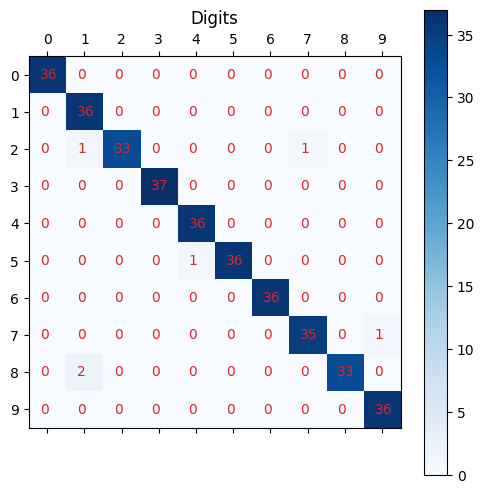

In [7]:
#пример классификации с нейронной сетью
import pandas as pd
import sklearn
from sklearn.datasets import load_digits, load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix1(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.title("Digits")
    plt.yticks(range(10), range(10))
    plt.xticks(range(10), range(10))
    plt.colorbar()
    for i in range(10):
        for j in range(10):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')
def plot_confusion_matrix2(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    fig = plt.figure(figsize=(2,3))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1) 
    plt.title("Iris")
    plt.yticks(range(3), range(3))
    plt.xticks(range(3), range(3))
    plt.colorbar()
    for i in range(3):
        for j in range(3):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')
digits=load_digits()
X_digits,Y_digits=digits.data,digits.target
iris=load_iris()
X_iris,Y_iris=iris.data,iris.target
X_train1, X_test1, Y_train1, Y_test1=train_test_split(X_digits,Y_digits,test_size=0.2,stratify=Y_digits,random_state=123)
X_train2, X_test2, Y_train2, Y_test2=train_test_split(X_iris,Y_iris,test_size=0.2,stratify=Y_iris,random_state=123) 
mlp_classifier1 = MLPClassifier(random_state=123)
mlp_classifier2 = MLPClassifier(random_state=123)
mlp_classifier1.fit(X_train1,Y_train1)
mlp_classifier2.fit(X_train2,Y_train2)
Y_preds1=mlp_classifier1.predict(X_test1)
Y_preds2=mlp_classifier2.predict(X_test2)
# print(Y_preds1[:15])
# print(Y_test1[:15])
# print(Y_preds2[:15])
# print(Y_test2[:15])
print("Точность теста 1:",round(mlp_classifier1.score(X_test1,Y_test1),3))
print("Точность тренировки 1:",round(mlp_classifier1.score(X_train1,Y_train1),3))
print("Точность теста 2:",round(mlp_classifier2.score(X_test2,Y_test2),3))
print("Точность тренировки 2:",round(mlp_classifier2.score(X_train2,Y_train2),3))
plot_confusion_matrix1(Y_test1, mlp_classifier1.predict(X_test1))
plt.show()
#plot_confusion_matrix2(Y_test2, mlp_classifier2.predict(X_test2))
#plt.show()
# print("Loss1:", mlp_classifier1.loss_)
# print("Coefs1:", len(mlp_classifier1.coefs_)) 
# print("Intercepts1:", len(mlp_classifier1.intercepts_))
# print("Number of Iterations for Which Estimator Ran1:", mlp_classifier1.n_iter_) 
# print("Name of Output Layer Activation Function1:", mlp_classifier1.out_activation_)


In [8]:
#Пример регрессии
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import load_breast_cancer
mlp_regressor=MLPRegressor(random_state=123)
cancer=load_breast_cancer()
X_c, Y_c = cancer.data, cancer.target
X_train, X_test, Y_train, Y_test=train_test_split(X_c,Y_c,test_size=0.2,stratify=Y_c,random_state=123) 
mlp_regressor.fit(X_train,Y_train)
Y_preds=mlp_regressor.predict(X_test)
# print(Y_preds[:15])
# print(Y_test[:15])
print("Test score:",round(mlp_regressor.score(X_test,Y_test),3))
print("Train score:",round(mlp_regressor.score(X_train,Y_train),3))
print("Loss:",round(mlp_regressor.loss_,3))

Test score: -3.731
Train score: -3.505
Loss: 0.564


C:\Users\borga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Задание 3
Используйте классы MLPClassified и MLPRegressor для классификации и
регрессии произвольных данных из интернета. Проведите анализ
атрибуты, полученных моделей

C:\Users\borga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


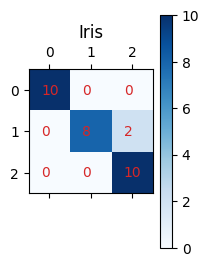

Loss2: 0.2988789340197434
Coefs2: 2
Intercepts2: 2
Number of Iterations for Which Estimator Ran2: 200
Name of Output Layer Activation Function2: softmax
Test score of regression: -8.796
Train score of regression: -8.261
Loss of regression: 2988058032.16
Coefs of regression: 2
Intercepts of regression: 2
Number of Iterations for Which Estimator Ran of regression: 200
Name of Output Layer Activation Functio of regression: identity


C:\Users\borga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\borga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


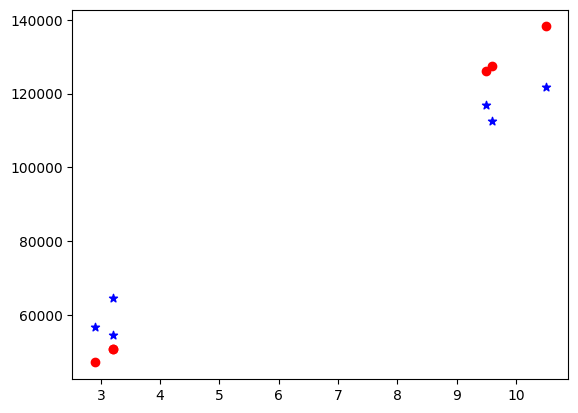

In [9]:
#Классификация
from sklearn.datasets import load_iris
def plot_confusion_matrix2(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    fig = plt.figure(figsize=(2,3))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1) 
    plt.title("Iris")
    plt.yticks(range(3), range(3))
    plt.xticks(range(3), range(3))
    plt.colorbar()
    for i in range(3):
        for j in range(3):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')
iris=load_iris()
X_iris,Y_iris=iris.data,iris.target
X_train2, X_test2, Y_train2, Y_test2=train_test_split(X_iris,Y_iris,test_size=0.2,stratify=Y_iris,random_state=123) 
mlp_classifier2 = MLPClassifier(random_state=123)
mlp_classifier2.fit(X_train2,Y_train2)
Y_preds2=mlp_classifier2.predict(X_test2)
plot_confusion_matrix2(Y_test2, mlp_classifier2.predict(X_test2))
plt.show()
print("Loss2:", mlp_classifier2.loss_)
print("Coefs2:", len(mlp_classifier2.coefs_)) 
print("Intercepts2:", len(mlp_classifier2.intercepts_))
print("Number of Iterations for Which Estimator Ran2:", mlp_classifier2.n_iter_) 
print("Name of Output Layer Activation Function2:", mlp_classifier2.out_activation_)
#Регрессия
url='https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
df=pd.read_csv(url)
X_pay=df.iloc[::,0]
Y_pay=df.iloc[:,1]
X_train3,X_test3,Y_train3,Y_test3=train_test_split(X_pay,Y_pay,test_size=0.2,random_state=123)
mlp_regressor2=MLPRegressor(random_state=123)
X_train3=np.array(X_train3).reshape(-1, 1)
Y_train3=np.array(Y_train3).reshape(-1, 1)
X_test3=np.array(X_test3).reshape(-1, 1)
Y_test3=np.array(Y_test3).reshape(-1, 1)
# print(X_train3.shape)
# print(X_test3.shape)
# print(Y_train3.shape)
# print(Y_test3.shape)
mlp_regressor2.fit(X_train3,Y_train3)
Y_preds3=mlp_regressor2.predict(X_test3)
Y_preds3.reshape(-1,1)
#print(Y_preds3.shape)
print("Test score of regression:",round(mlp_regressor2.score(X_test3,Y_test3),3))
print("Train score of regression:",round(mlp_regressor2.score(X_train3,Y_train3),3))
print("Loss of regression:",round(mlp_regressor2.loss_,3))
print("Coefs of regression:", len(mlp_regressor2.coefs_)) 
print("Intercepts of regression:", len(mlp_regressor2.intercepts_))
print("Number of Iterations for Which Estimator Ran of regression:", mlp_regressor2.n_iter_) 
print("Name of Output Layer Activation Functio of regression:", mlp_regressor2.out_activation_)
#print(Y_test3)
Y_preds3*=2500

plt.scatter(X_test3,Y_test3,marker='*',color='blue')
plt.scatter(X_test3,Y_preds3,marker='o',color='red',)
plt.show()